# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

#### 1 

In [20]:
clf = SVR()
clf.fit(x_train, y_train)
rbf_train_prediction = clf.predict(x_train)
print 'train: ', np.sqrt(mean_squared_error(y_train, rbf_train_prediction))

rbf_test_prediction = clf.predict(x_test)
print 'test: ', np.sqrt(mean_squared_error(y_test, rbf_test_prediction))

train:  0.174703118961
test:  0.549667753896


#### 2 

In [12]:
print 'SVR'
clf = SVR(kernel='linear')
clf.fit(x_train, y_train)
linear_train_prediction = clf.predict(x_train)
print 'train: ', np.sqrt(mean_squared_error(y_train, linear_train_prediction))

linear_test_prediction = clf.predict(x_test)
print 'test: ', np.sqrt(mean_squared_error(y_test, linear_test_prediction))

print 'Linear Regression'
regr = LinearRegression()
regr.fit(x_train, y_train)
regr_train_prediction = regr.predict(x_train)
print 'train: ', np.sqrt(mean_squared_error(y_train, regr_train_prediction))

regr_test_prediction = regr.predict(x_test)
print 'test: ', np.sqrt(mean_squared_error(y_test, regr_test_prediction))

SVR
train:  0.477967720085
test:  0.231968041522
Linear Regression
train:  0.458060629343
test:  0.260057137391


#### 3

The RMSE for SVR with RBF on the training set is significantly smaller than the that of the other methods, but the RMESE on the test set is bigger than other methodes. It's possbile the RBF method is overfitting the training set.

#### 4

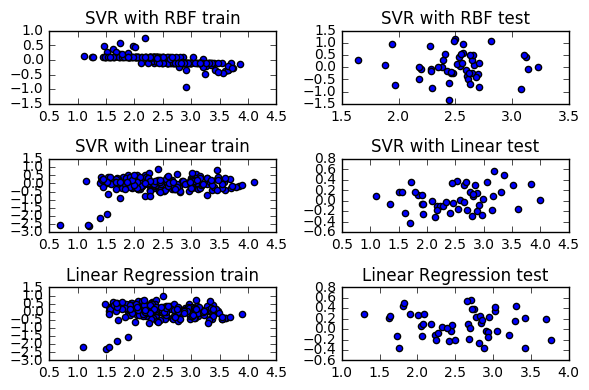

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.subplot(321)
plt.title('SVR with RBF train')
x321 = rbf_train_prediction
y321 = rbf_train_prediction - y_train
plt.scatter(x321, y321)

plt.subplot(322)
plt.title('SVR with RBF test')
x322 = rbf_test_prediction
y322 = rbf_test_prediction - y_test
plt.scatter(x322, y322)

plt.subplot(323)
plt.title('SVR with Linear train')
x323 = linear_train_prediction
y323 = linear_train_prediction - y_train
plt.scatter(x323, y323)

plt.subplot(324)
plt.title('SVR with Linear test')
x324 = linear_test_prediction
y324 = linear_test_prediction - y_test
plt.scatter(x324, y324)

plt.subplot(325)
plt.title('Linear Regression train')
x325 = regr_train_prediction
y325 = regr_train_prediction - y_train
plt.scatter(x325, y325)

plt.subplot(326)
plt.title('Linear Regression test')
x326 = regr_test_prediction
y326 = regr_test_prediction - y_test
plt.scatter(x326, y326)

plt.tight_layout()

SVR with RBF does a much better job capture outliers in the training set than the other two models. All three models perform about the same in the test set in terms of outliers, but Linear SVR and linear regression have smaller errors.

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

#### (a) 

\begin{equation*}
P(C=T|X=T,Y=T) = \frac{P(X=T,Y=T|C=T)P(C=T)}{P(X=T,Y=T)}\\
=\frac{P(X=T|C=T)P(Y=T|C=T)P(C=T)}{P(X=T,Y=T|C=T)P(C=T)+P(X=T,Y=T|C=F)P(C=F)}\\
=\frac{P(X=T|C=T)P(Y=T|C=T)P(C=T)}{P(X=T|C=T)P(Y=T|C=T)P(C=T)+P(X=T|C=F)P(Y=T|C=F)P(C=F)}\\
=\frac{.75*.25*.5}{.75*.25*.5+.5*.5*.5}
=\frac{3}{7}
\end{equation*}

#### (b) 

#### Case 1
$P(X,Y,Z|C=T) = P(X|C=T)P(Y|C=T)P(Z|X,Y)$

$P(X,Y,Z|C=F) = P(X|C=F)P(Y|C=F)P(Z|X,Y)$

Therefore, $$P(C|X,Y,Z) = \frac{P(X,Y,Z|C=T)P(C=T)}{P(X,Y,Z)}=\frac{P(X|C=T)P(Y|C=T)P(Z|X,Y)P(C=T)}{P(X,Y,Z|C=T)P(C=T)+P(X,Y,Z|C=F)P(C=F)}$$

$$=\frac{P(X|C=T)P(Y|C=T)P(C=T)}{P(X|C=T)P(Y|C=T)P(C=T)+P(X|C=F)P(Y|C=F)P(C=F)}$$

This is same form as the one in part(a), which doesn't consider Z.
#### Case 2
$P(X,Y,Z|C=T) = P(X|C=T)P(Y|C=T,Z)P(Z|X)$

$P(X,Y,Z|C=F) = P(X|C=F)P(Y|C=F,Z)P(Z|X)$

Therefore, $$P(C|X,Y,Z) = \frac{P(X,Y,Z|C=T)P(C=T)}{P(X,Y,Z)}=\frac{P(X|C=T)P(Y|C=T,Z)P(C=T)}{P(X|C=T)P(Y|C=T,Z)P(C=T)+P(X|C=F)P(Y|C=F,Z)P(C=F)}$$

In this case, the new conditional probability also depends on Z.

# Question 5: Mulitclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

1. Briefly describe the  One-vs.-All method.  (2pts)

2. What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

#### 1

In the one-vs-all method, a binary model is created for each of the multiple output classes. Each of these binary models for the individual classes is assessed against its complement (all other classes in the model) as though it were a binary classification issue. Prediction is then performed by running these binary classifiers, and choosing the prediction with the highest confidence.

#### 2 

1. If the classes are mixed together, instead of seperated from one another, it might be hard to find linear classifiers that work well.
2. The binary classification learners see unbalanced distributions in the data because typically the set of negatives they see is much larger than the set of positives